In [1]:
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.layers import Input,Dense,Concatenate, BatchNormalization

from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import classification_report
from keras import backend as K
import numpy as np
import pandas as pd

In [2]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# #2. Get the file
# downloaded = drive.CreateFile({'id':"1UvXY6AxUMkjT6YKKDXuvRqXX0G6IpJP9"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('train_final.npy')

In [5]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1ocFitiwHqMAPF-QVQlroKqE5r7n4g7zT"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train_labels.npy')

In [6]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1SUBVmvp28XqmuXMGzywqQEEK657ZcMn2"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test_labels.npy')

In [7]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1pym5XouSsVqAPk4P68-CqDnBWYgc5hd5"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train_neural.npy')

In [8]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1jhTmt48K0clR5OyUkGTlVy2hOAfIJRtS"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test_neural.npy')

In [9]:
#2. Get the file
downloaded = drive.CreateFile({'id':"15ad2daklNuix8Y30YXjyOi0xRBkRRgZ1"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train_statistical.npy')

In [10]:
#2. Get the file
downloaded = drive.CreateFile({'id':"19AzNiFH5XYys5JG9HduwytlxOlsLuhnE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test_statistical.npy')

In [11]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1VW3zMqQ0ipGkNJBhDSV9fSeDn-wwCWi6"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train_external.npy')

In [12]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1-0a8WKgtiIluHC9PxyqzHq_GnOghYLoz"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test_external.npy')

In [13]:
#2. Get the file
downloaded = drive.CreateFile({'id':"113-gh1eSh4-bdlGbh01__v-oisiRkgAt"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')

In [14]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1Ry-nwu9UTgnNu91g7XfO55iKEeni-sQN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')

In [15]:
#train_labels = np.load('train_labels.npy')
#test_labels = np.load('test_labels.npy').tolist()

In [16]:
train_external = np.load('train_external.npy')
# train_External = [x for x in train_external]
# del train_external
test_external = np.load('test_external.npy')

In [17]:
train_neural = np.load('train_neural.npy')
# train_Neural = [x for x in train_neural]
# del train_neural
test_neural = np.load('test_neural.npy')

In [18]:
train_statistical = np.load('train_statistical.npy')
# train_Statistical = [x for x in train_statistical]
# del train_statistical
test_statistical = np.load('test_statistical.npy')

In [19]:
train_index = np.load('train_labels.npy')
test_index = np.load('test_labels.npy')

In [20]:
stance_to_index = {'agree':0,'disagree':1,'discuss':2,'unrelated':3}
index_to_stance = {0:'agree',1:'disagree',2:'discuss',3:'unrelated'}

In [21]:
df_train = pd.read_csv('train.csv')
Y_temp = df_train[['Stance']]
Y_temp = Y_temp.values.tolist()
Y_train = [stance_to_index[Y_temp[i][0]] for i in train_index] 
Y_train = np.array(Y_train)

In [22]:
Y_train

array([3, 0, 3, ..., 3, 0, 2])

In [23]:
#Limiting class 4 examples to 3000
counter = 0
train_neural_new = []
train_statistical_new = []
train_external_new = []
Y_train_new = []
for i,y in enumerate(Y_train):
    if y == 3:
        counter+=1
        if(counter<=3000):
            Y_train_new.append(y)
            train_neural_new.append(train_neural[i])
            train_statistical_new.append(train_statistical[i])
            train_external_new.append(train_external[i])
            
        else:
            continue
    else:
        Y_train_new.append(y)
        train_neural_new.append(train_neural[i])
        train_statistical_new.append(train_statistical[i])
        train_external_new.append(train_external[i])

In [24]:
from collections import Counter
print(Counter(Y_train_new).keys()) # equals to list(set(words))
print(Counter(Y_train_new).values()) # counts the elements' frequency

dict_keys([3, 0, 2, 1])
dict_values([3000, 1906, 4732, 399])


In [25]:
# train = np.load('train_final.npy')
# X_train = [x for x in train]
# del train

In [26]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = np.zeros(categories,dtype=float)
        cats[s] = 1.0
        #for item in s:
            
            
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [27]:
#X_train[0].shape

In [28]:
df_test = pd.read_csv('test.csv')
Y_temp1 = df_test[['Stance']]
Y_temp1 = Y_temp1.values.tolist()
Y_test = [stance_to_index[Y_temp1[i][0]] for i in test_index]
Y_check = Y_test

In [29]:
#Limiting class 4 examples to 3000
counter = 0
test_neural_new = []
test_statistical_new = []
test_external_new = []
Y_test_new = []
for i,y in enumerate(Y_test):
    if y == 3:
        counter+=1
        if(counter<=3000):
            Y_test_new.append(y)
            test_neural_new.append(test_neural[i])
            test_statistical_new.append(test_statistical[i])
            test_external_new.append(test_external[i])
            
        else:
            continue
    else:
        Y_test_new.append(y)
        test_neural_new.append(test_neural[i])
        test_statistical_new.append(test_statistical[i])
        test_external_new.append(test_external[i])

In [30]:
Y_check_new = Y_test_new

In [31]:
from collections import Counter
print(Counter(Y_test).keys()) # equals to list(set(words))
print(Counter(Y_test).values()) # counts the elements' frequency

dict_keys([3, 0, 2, 1])
dict_values([10188, 1026, 2288, 425])


In [32]:
from collections import Counter
print(Counter(Y_test_new).keys()) # equals to list(set(words))
print(Counter(Y_test_new).values()) # counts the elements' frequency

dict_keys([3, 0, 2, 1])
dict_values([3000, 1026, 2288, 425])


In [33]:
inputA = Input(shape=(4800,))
inputB = Input(shape=(10000,))
inputC = Input(shape=(21,))
# the first branch operates on the first input
x = Dense(2048, activation="relu")(inputA)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(512, activation="relu")(inputB)
y = Dense(256, activation="relu")(y)
y = Dense(128, activation="relu")(y)
y = Dense(64, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

z = Dense(4, activation = "relu")(inputC)
z = Model(inputs = inputC, outputs = z)
# combine the output of the three branches
combined = Concatenate()([x.output, z.output, y.output])
#print(combined.shape)
# apply a FC layer and then a regression prediction on the
# combined outputs
z1 = BatchNormalization()(combined)
#z = Dense(2, activation="relu")(combined)
z1 = Dense(4, activation="softmax")(z1)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, z.input,  y.input], outputs=z1)

In [34]:
#len(X_train)

In [35]:
#type(X_train[0])

In [36]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4800)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         9832448     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         2098176     dense[0][0]                      
_______________________________________________________________________________________

In [37]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(0.001),metrics=['accuracy'])


In [38]:
Y_train_new = np.array(Y_train_new)

In [39]:
Y_train_new = to_categorical(Y_train_new,len(stance_to_index))

In [40]:
train_neural_new = np.array(train_neural_new)
train_statistical_new = np.array(train_statistical_new)
train_external_new = np.array(train_external_new)

In [41]:
Y_train = to_categorical(Y_train, len(stance_to_index))

In [42]:
train_neural = np.array(train_neural)
train_statistical = np.array(train_statistical)
train_external = np.array(train_external)

In [43]:
#model.fit(x = [train_neural,train_external,train_statistical], y = np.array(Y_train),batch_size=8,	epochs=5,validation_split=0.2)

In [44]:
model.fit(x = [train_neural_new,train_external_new,train_statistical_new], y = np.array(Y_train_new),batch_size =8,epochs=8,validation_split=0.2)

Epoch 1/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.6113 - accuracy: 0.7792 - val_loss: 0.4196 - val_accuracy: 0.8367
Epoch 2/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.3669 - accuracy: 0.8712 - val_loss: 0.3888 - val_accuracy: 0.8541
Epoch 3/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.2755 - accuracy: 0.9048 - val_loss: 0.3838 - val_accuracy: 0.8591
Epoch 4/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.2168 - accuracy: 0.9239 - val_loss: 0.3339 - val_accuracy: 0.8899
Epoch 5/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.1707 - accuracy: 0.9401 - val_loss: 0.3189 - val_accuracy: 0.9079
Epoch 6/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.1434 - accuracy: 0.9537 - val_loss: 0.2572 - val_accuracy: 0.9213
Epoch 7/8
1004/1004 [==============================] - 6s 6ms/step - loss: 0.1119 - accuracy: 0.9633 - val_loss: 0.2838 - val_accuracy: 0.9193

In [45]:
def ret_tags(sequences, index):
    tags = []
    for sequence in sequences:
        temp = index[np.argmax(sequence)]
        
        #temp.append(index[np.argmax(sequence)])
 
        tags.append(temp)
 
    return tags

In [46]:
test_neural_new = np.array(test_neural_new)
test_statistical_new = np.array(test_statistical_new)
test_external_new = np.array(test_external_new)

In [47]:
!sudo pip install h5py

In [48]:
scores = model.evaluate([test_neural,test_external,test_statistical], to_categorical(Y_test, len(stance_to_index))) 

print(f"{model.metrics_names[1]}: {scores[1] * 100}")

436/436 [==============================] - 2s 4ms/step - loss: 0.5447 - accuracy: 0.8389
accuracy: 83.8874101638794


In [49]:
# #2. Get the file
# downloaded = drive.CreateFile({'id':"10yhV5Gz_xwJKQ9ZgmFBZEYTEi5r-YXFw"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('model_main.h5')

In [50]:
#model_main = load_model('model_main.h5')

In [51]:
# scores = model_main.evaluate([test_neural,test_external,test_statistical], to_categorical(Y_test, len(stance_to_index))) 

# print(f"{model_main.metrics_names[1]}: {scores[1] * 100}")

In [52]:
pred = model.predict([test_neural,test_external,test_statistical])

In [53]:
predictions = ret_tags(pred, {i: t for t, i in stance_to_index.items()})

In [54]:
len(predictions)

13927

In [55]:
len(Y_check)

13927

In [56]:
Yres = [index_to_stance[x] for x in Y_check]

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Yres, predictions))

              precision    recall  f1-score   support

       agree       0.17      0.04      0.07      1026
    disagree       0.12      0.00      0.00       425
     discuss       0.55      0.74      0.63      2288
   unrelated       0.94      0.98      0.96     10188

    accuracy                           0.84     13927
   macro avg       0.45      0.44      0.42     13927
weighted avg       0.79      0.84      0.81     13927



In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yres,predictions)

In [59]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

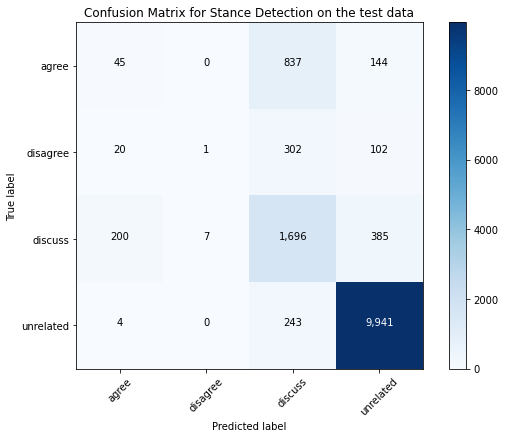

In [60]:
plot_confusion_matrix(cm,normalize=False,target_names = ['agree','disagree','discuss','unrelated'],title='Confusion Matrix for Stance Detection on the test data')

In [61]:
predictions

['unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agree',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'agree',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'disagree',
 'unrelated',
 'unrelated',
 'agree',
 'unrelated',
 'discuss',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'discuss',
 'agree',
 'unrelated',
 'unrelated',
 'discuss',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated

In [68]:
train_neural[0]

array([0.40915006, 0.40915006, 0.40915006, ..., 0.00900494, 0.01685593,
       0.00782146])

In [81]:
def demo(neural,external,statistical,model):
  final = [neural.reshape((1,4800)),external.reshape((1,21)),statistical.reshape((1,10000))]
  pred = model.predict(final)
  stance = ret_tags(pred, {i: t for t, i in stance_to_index.items()})
  return stance

In [87]:
demo(np.array(train_neural[5]),np.array(train_external[5]),np.array(train_statistical[5]),model)

['agree']